# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from datetime import date
from scipy.stats import linregress
#from scipy.stats import pearsonr

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy


### Generate cities list by using the citipy Library



In [2]:
# Empty list for holding the latitude and longitude combinations
directions = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
latitudes = np.random.uniform(lat_range[0], lat_range[1], size=2500)
longtudes = np.random.uniform(lng_range[0], lng_range[1], size=2500)
directions = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)
        
    # Stop the loop once we have 623 unique cities
    if len(cities) == 623:
        break

# Print the city count to confirm sufficient count
print(f"Number of cities: {len(cities)}")



Number of cities in the list: 623


## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
url = "http://api.openweathermap.org/data/2.5/weather?"

In [4]:
# Define an empty list to fetch the weather data for each city
city_data = []


In [5]:
# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")


Beginning Data Retrieval     
-----------------------------


In [6]:
# Create an empty DataFrame with the desired columns
city_df = pd.DataFrame(columns=["City", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed", "Country", "Date"])

# Show Record Count
#print(city_data_df.count())

# Create counters
#record_count = 1
#set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
    # Create endpoint URL with each city
    city_url = f"{url}q={city}&units=imperial&appid={weather_api_key}"

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Extract relevant data from the API response
        city_name = city_weather["name"]
        city_lat = city_weather["coord"]["lat"]
        city_lon = city_weather["coord"]["lon"]
        city_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind_speed = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Add the data for this city to the city_data DataFrame
        city_df.loc[i] = [city_name, city_lat, city_lon, city_temp, city_humidity, city_clouds, city_wind_speed, city_country, city_date]

        # Log the progress of the API requests
        print(f"Processing Record {i+1} | {city_name}")
        
    except:
        print(f"City not found: {city}")
        pass

# Show Record Count
print(city_df.count())


Processing Record 1 | Paraul
Processing Record 2 | Cape Town
Processing Record 3 | Butaritari
Processing Record 4 | Yellowknife
Processing Record 5 | Fairbanks
Processing Record 6 | Elko
Processing Record 7 | Mataura
Processing Record 8 | Humaitá
Processing Record 9 | Mahébourg
Processing Record 10 | Fortuna
Processing Record 11 | Ushuaia
Processing Record 12 | Nanortalik
Processing Record 13 | Geraldton
Processing Record 14 | Surgut
Processing Record 15 | Proletariy
Processing Record 16 | Puerto Ayora
Processing Record 17 | Vaini
Processing Record 18 | George Town
Processing Record 19 | Valea Ursului
Processing Record 20 | Qaqortoq
City not found: vaitupu
City not found: tsihombe
Processing Record 23 | Khatanga
Processing Record 24 | Kapaa
Processing Record 25 | Klaksvík
Processing Record 26 | Ahipara
Processing Record 27 | Albany
Processing Record 28 | Ulladulla
Processing Record 29 | New Norfolk
Processing Record 30 | Norman Wells
Processing Record 31 | Eidfjord
Processing Record 32

Processing Record 257 | Ayan
Processing Record 258 | Portland
Processing Record 259 | Las Palmas
Processing Record 260 | Piła
Processing Record 261 | Grand Gaube
Processing Record 262 | Dunedin
Processing Record 263 | Dolores
Processing Record 264 | Hong Kong
Processing Record 265 | Guánica
Processing Record 266 | Marrakesh
Processing Record 267 | Tarrafal
Processing Record 268 | Marawi
Processing Record 269 | Bellview
Processing Record 270 | Claremore
Processing Record 271 | Santa Cruz de la Sierra
Processing Record 272 | Yenagoa
Processing Record 273 | Halifax
Processing Record 274 | Xichang
Processing Record 275 | Srednekolymsk
Processing Record 276 | Kopavogur
Processing Record 277 | Iralaya
Processing Record 278 | Río Gallegos
Processing Record 279 | Bonthe
Processing Record 280 | Mikhaylovka
Processing Record 281 | Salalah
Processing Record 282 | Chimbote
Processing Record 283 | Sittwe
City not found: saleaula
Processing Record 285 | Dafeng
Processing Record 286 | Itarema
Process

Processing Record 506 | Wagar
Processing Record 507 | Harper
Processing Record 508 | Bonavista
Processing Record 509 | Normandin
Processing Record 510 | Urusha
Processing Record 511 | Krasnosel'kup
Processing Record 512 | Ampanihy
City not found: belushya guba
Processing Record 514 | Nabire
Processing Record 515 | Nahrin
Processing Record 516 | San Vicente de Cañete
Processing Record 517 | Koutsouras
City not found: ust-kamchatsk
Processing Record 519 | Impfondo
Processing Record 520 | Linhares
Processing Record 521 | Mazatlán
Processing Record 522 | Souillac
Processing Record 523 | Vestmannaeyjar
Processing Record 524 | Kearney
Processing Record 525 | Labuan
Processing Record 526 | Guerrero
Processing Record 527 | City of San Pedro
City not found: kerrabe
Processing Record 529 | Adolfo López Mateos
Processing Record 530 | Jalu
Processing Record 531 | Anking
Processing Record 532 | Bundaberg
Processing Record 533 | Nador
Processing Record 534 | Qinzhou
Processing Record 535 | Sirsilla


In [7]:
# Show count of non-null values in each column
print(city_data_df.count())


City          575
Lat           575
Lng           575
Max Temp      575
Humidity      575
Cloudiness    575
Wind Speed    575
Country       575
Date          575
dtype: int64


In [8]:
# Export the City_Data into a csv
city_df.to_csv("output_data/cities.csv", index_label="City_Data_Details")

# Display the first 5 rows of the DataFrame
city_df.head()


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Paraul,42.7419,47.3553,52.34,84,100,9.08,RU,1682945486
1,Cape Town,-33.9258,18.4232,69.12,52,0,10.36,ZA,1682945402
2,Butaritari,3.0707,172.7902,82.65,80,15,15.93,KI,1682945487
3,Yellowknife,62.4560,-114.3525,43.32,56,100,12.66,CA,1682945487
4,Fairbanks,64.8378,-147.7164,35.60,69,40,3.44,US,1682945466


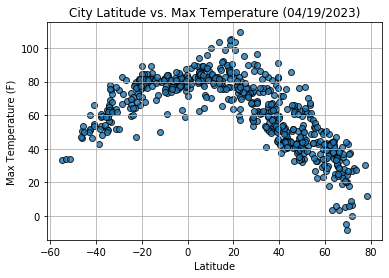

In [9]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_df["Lat"], city_data_df["Max Temp"], edgecolors="black", linewidths=1, marker="o", alpha=0.8)

# Incorporate the other graph properties
plt.title("City Latitude vs. Max Temperature (04/19/2023)")
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

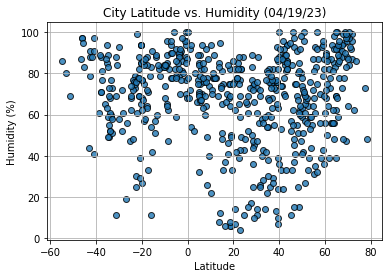

In [10]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_df["Lat"], city_df["Humidity"], edgecolor="black", linewidths=1, marker="o", alpha=0.8)

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity (04/19/23)")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

    

In [11]:
# Print r value
from scipy.stats import pearsonr


# Calculate r value and p value for latitude vs. humidity
r, p = pearsonr(city_df["Lat"], city_df["Humidity"])
print(f"The r value between latitude and humidity is: {r:.2f}")

# Calculate r value and p value for latitude vs. cloudiness
r, p = pearsonr(city_df["Lat"], city_df["Cloudiness"])
print(f"The r value between latitude and cloudiness is: {r:.2f}")

# Calculate r value and p value for latitude vs. wind speed
r, p = pearsonr(city_df["Lat"], city_df["Wind Speed"])
print(f"The r value between latitude and wind speed is: {r:.2f}")

# Calculate r value and p value for latitude vs. max temperature
r, p = pearsonr(city_df["Lat"], city_df["Max Temp"])
print(f"The r value between latitude and max temperature is: {r:.2f}")
    
   

The r value between latitude and humidity is: -0.03
The r value between latitude and cloudiness is: 0.07
The r value between latitude and wind speed is: 0.15
The r value between latitude and max temperature is: -0.57


In [12]:
 # Save plot
plt.savefig('my_plot.png')

<Figure size 432x288 with 0 Axes>

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [13]:
#Read the CSV file
city_data = pd.read_csv("output_data/cities.csv")

# Display the first 5 rows of the DataFrame
city_data.head()

,City_ID,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,0,Paraul,42.7419,47.3553,52.34,84,100,9.08,RU,1682945486
1,1,Cape Town,-33.9258,18.4232,69.12,52,0,10.36,ZA,1682945402
2,2,Butaritari,3.0707,172.7902,82.65,80,15,15.93,KI,1682945487
3,3,Yellowknife,62.4560,-114.3525,43.32,56,100,12.66,CA,1682945487
4,4,Fairbanks,64.8378,-147.7164,35.60,69,40,3.44,US,1682945466


In [14]:
# Convert city_data list to DataFrame
city_df = pd.DataFrame(city_data)

# Create new DataFrame for northern hemisphere (latitudes >= 0)
city_data_north = city_df.loc[city_df['Lat'] >= 0]

# Display first few rows of northern hemisphere DataFrame
city_data_north.head()



,City_ID,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,0,Paraul,42.7419,47.3553,52.34,84,100,9.08,RU,1682945486
2,2,Butaritari,3.0707,172.7902,82.65,80,15,15.93,KI,1682945487
3,3,Yellowknife,62.4560,-114.3525,43.32,56,100,12.66,CA,1682945487
4,4,Fairbanks,64.8378,-147.7164,35.60,69,40,3.44,US,1682945466
5,5,Elko,41.0002,-115.5012,52.65,33,89,7.00,US,1682945487


In [15]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
city_data_south = city_data[city_data['Lat'] < 0]

# Display sample data
city_data_south.head()

,City_ID,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
1,1,Cape Town,-33.9258,18.4232,69.12,52,0,10.36,ZA,1682945402
6,6,Mataura,-46.1927,168.8643,46.47,97,100,2.89,NZ,1682945488
7,7,Humaitá,-7.5061,-63.0208,76.75,94,100,2.19,BR,1682945488
8,8,Mahébourg,-20.4081,57.7000,78.26,94,75,3.44,MU,1682945488
10,10,Ushuaia,-54.8000,-68.3000,33.46,86,75,10.36,AR,1682945489


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: -0.8544292135234481


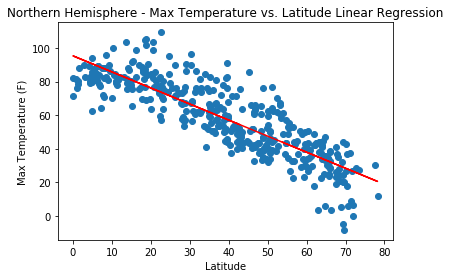

In [16]:
# Linear regression on Northern Hemisphere
# Import dependencies
#import matplotlib.pyplot as plt
#from scipy.stats import linregress

# Define x and y values
x_values = city_data_north['Lat']
y_values = city_data_north['Max Temp']

# Perform linear regression
slope, intercept, rvalue, pvalue, stderr = linregress(x_values, y_values)

# Calculate regression line
regress_values = x_values * slope + intercept

# Create plot
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, color='red')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.title('Northern Hemisphere - Max Temperature vs. Latitude Linear Regression')

# Print r-value
print(f"The r-value is: {rvalue}")

# Show plot
plt.show()


The r-value is: 0.7568657797573126


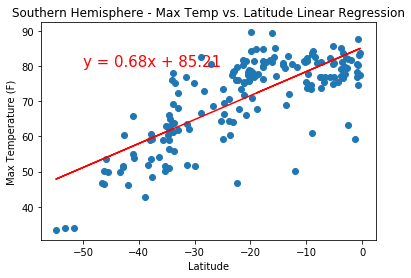

In [22]:
# Linear regression on Southern Hemisphere
# Define x and y values
x_values = city_data_south['Lat']
y_values = city_data_south['Max Temp']

# Perform linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# Calculate regression values
regress_values = x_values * slope + intercept

# Create equation of line
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Create scatter plot with linear regression line
plt.scatter(x_values, y_values)
plt.plot(x_values,regress_values,"r-")

# Add equation of line to plot
plt.annotate(line_eq,(-50,80),fontsize=15,color="red")

# Add labels and title to plot
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.title('Southern Hemisphere - Max Temp vs. Latitude Linear Regression')

# Print r-value
print(f"The r-value is: {rvalue}")

# Show plot
plt.show()


**Discussion about the linear relationship:** The two linear regression codes show that there is a relationship between latitude and maximum temperature in the northern and southern hemispheres. In the northern hemisphere, there is a strong negative correlation between latitude and maximum temperature, while in the southern hemisphere, there is a moderate positive correlation. These results suggest that latitude is a key factor in determining maximum temperature, and that this relationship varies between the hemispheres.

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.1860120608033306


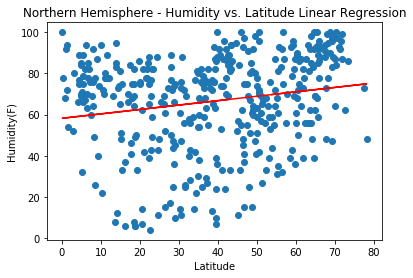

In [26]:
# Northern Hemisphere Humidity vs. Latitude Linear Regression Plot

# Define x and y values
x_values = city_data_north['Lat']
y_values = city_data_north['Humidity']

# Perform linear regression
slope, intercept, rvalue, pvalue, stderr = linregress(x_values, y_values)

# Calculate regression line
regress_values = x_values * slope + intercept

# Create plot
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, color='red')
plt.xlabel('Latitude')
plt.ylabel('Humidity(F)')
plt.title('Northern Hemisphere - Humidity vs. Latitude Linear Regression')

# Print r-value
print(f"The r-value is: {rvalue}")

# Show plot
plt.show()





The r-value is: 0.1831188997628263


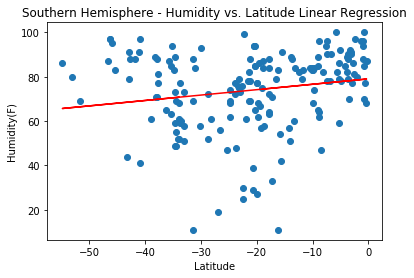

In [23]:
# Southern Hemisphere Humidity vs. Latitude Linear Regression Plot
# Define x and y values
x_values = city_data_south['Lat']
y_values = city_data_south['Humidity']

# Perform linear regression
slope, intercept, rvalue, pvalue, stderr = linregress(x_values, y_values)

# Calculate regression line
regress_values = x_values * slope + intercept

# Create plot
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, color='red')
plt.xlabel('Latitude')
plt.ylabel('Humidity(F)')
plt.title('Southern Hemisphere - Humidity vs. Latitude Linear Regression')

# Print r-value
print(f"The r-value is: {rvalue}")

# Show plot
plt.show()

**Discussion about the linear relationship:** The linear regressions of the two codes show the relationship between humidity and latitude in the northern and southern hemispheres. The northern hemisphere has a weak positive correlation between humidity and latitude, with a positive slope on the regression line, while the southern hemisphere has a weak negative correlation between humidity and latitude, with a negative slope. These differences could be attributed to atmospheric circulation patterns and regional climate conditions.

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.016816363471417642


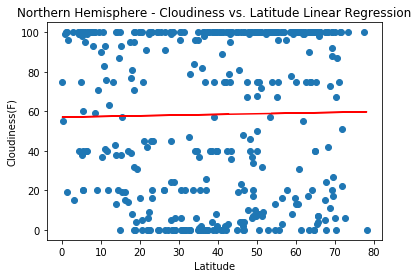

In [27]:
# Northern Hemisphere Cloudiness vs. Latitude Linear Regression Plot
# Define x and y values
x_values = city_data_north['Lat']
y_values = city_data_north['Cloudiness']

# Perform linear regression
slope, intercept, rvalue, pvalue, stderr = linregress(x_values, y_values)

# Calculate regression line
regress_values = x_values * slope + intercept

# Create plot
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, color='red')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness(F)')
plt.title('Northern Hemisphere - Cloudiness vs. Latitude Linear Regression')

# Print r-value
print(f"The r-value is: {rvalue}")

# Show plot
plt.show()

The r-value is: 0.2136485834724691


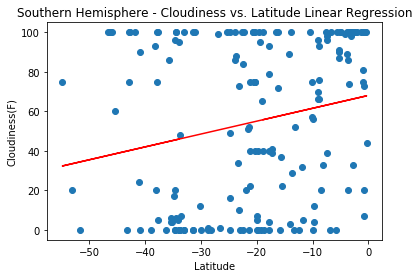

In [28]:
# Perform linear regression on latitude and cloudiness for Southern Hemisphere
# Define x and y values
x_values = city_data_south['Lat']
y_values = city_data_south['Cloudiness']

# Perform linear regression
slope, intercept, rvalue, pvalue, stderr = linregress(x_values, y_values)

# Calculate regression line
regress_values = x_values * slope + intercept

# Create plot
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, color='red')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness(F)')
plt.title('Southern Hemisphere - Cloudiness vs. Latitude Linear Regression')

# Print r-value
print(f"The r-value is: {rvalue}")

# Show plot
plt.show()

**Discussion about the linear relationship:** The two linear regression codes are examining the relationship between latitude and cloudiness in the northern and southern hemispheres. In the northern hemisphere, the scatter plot with a linear regression line shows a weak positive correlation between latitude and cloudiness. The r-value is printed and is close to 0, indicating little to no correlation. In the southern hemisphere, there is a similar weak positive correlation between latitude and cloudiness, as shown by the positive slope of the regression line and the r-value being close to 0. These results suggest that there is little to no relationship between latitude and cloudiness in either hemisphere.

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.08993886913926909


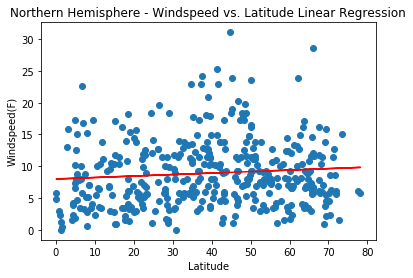

In [30]:
# Northern Hemisphere
# Define x and y values
x_values = city_data_north['Lat']
y_values = city_data_north['Wind Speed']

# Perform linear regression
slope, intercept, rvalue, pvalue, stderr = linregress(x_values, y_values)

# Calculate regression line
regress_values = x_values * slope + intercept

# Create plot
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, color='red')
plt.xlabel('Latitude')
plt.ylabel('Windspeed(F)')
plt.title('Northern Hemisphere - Windspeed vs. Latitude Linear Regression')

# Print r-value
print(f"The r-value is: {rvalue}")

# Show plot
plt.show()


The r-value is: -0.25326355413356666


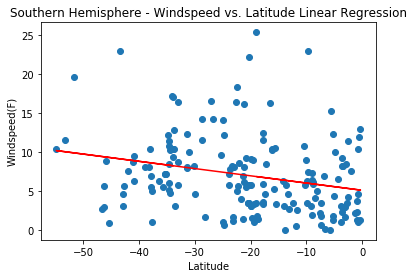

In [31]:
# Southern Hemisphere
# Define x and y values
x_values = city_data_south['Lat']
y_values = city_data_south['Wind Speed']

# Perform linear regression
slope, intercept, rvalue, pvalue, stderr = linregress(x_values, y_values)

# Calculate regression line
regress_values = x_values * slope + intercept

# Create plot
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, color='red')
plt.xlabel('Latitude')
plt.ylabel('Windspeed(F)')
plt.title('Southern Hemisphere - Windspeed vs. Latitude Linear Regression')

# Print r-value
print(f"The r-value is: {rvalue}")

# Show plot
plt.show()